In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv("/content/15. Treatment Cost.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1332 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1332.000000,1338.000000,1338.000000,1338.000000
mean,39.195946,30.663397,1.094918,13270.422265
std,14.033283,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.isnull().sum()

,0
age,6
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows

Number of duplicate rows: 1


,age,sex,bmi,children,smoker,region,charges
581,19.0,male,30.59,0,no,northwest,1639.5631


In [11]:
data = data.drop_duplicates()
print("Number of duplicate rows after removing:", data[data.duplicated()].shape[0])

Number of duplicate rows after removing: 0


In [12]:
data.shape

(1337, 7)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying the original
data_encoded = data.copy()

# Initialize the encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
data_encoded['sex'] = le.fit_transform(data_encoded['sex'])
data_encoded['smoker'] = le.fit_transform(data_encoded['smoker'])
data_encoded['region'] = le.fit_transform(data_encoded['region'])

# Display the updated DataFrame
print(data_encoded.head())

print(data_encoded.head())

    age  sex     bmi  children  smoker  region      charges
0  19.0    0  27.900         0       1       3  16884.92400
1  18.0    1  33.770         1       0       2   1725.55230
2  28.0    1  33.000         3       0       2   4449.46200
3  33.0    1  22.705         0       0       1  21984.47061
4  32.0    1  28.880         0       0       1   3866.85520
    age  sex     bmi  children  smoker  region      charges
0  19.0    0  27.900         0       1       3  16884.92400
1  18.0    1  33.770         1       0       2   1725.55230
2  28.0    1  33.000         3       0       2   4449.46200
3  33.0    1  22.705         0       0       1  21984.47061
4  32.0    1  28.880         0       0       1   3866.85520


<Axes: xlabel='charges', ylabel='Count'>

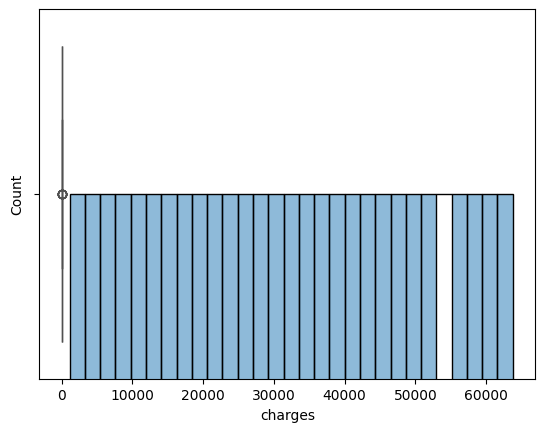

In [14]:
sns.histplot(data['charges'], kde=True)
sns.boxplot(x=data['bmi'])

<Axes: xlabel='smoker', ylabel='count'>

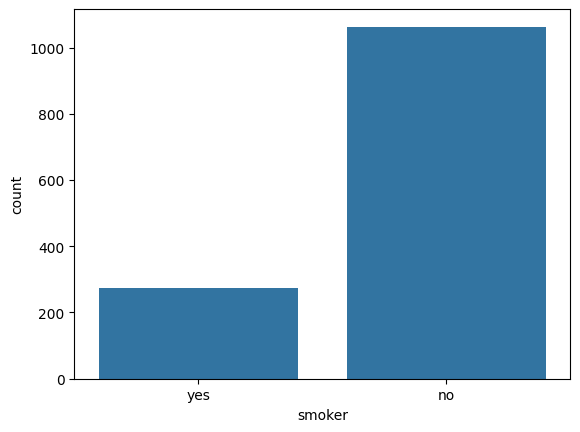

In [15]:
sns.countplot(x='smoker', data=data)

<Axes: xlabel='charges', ylabel='Count'>

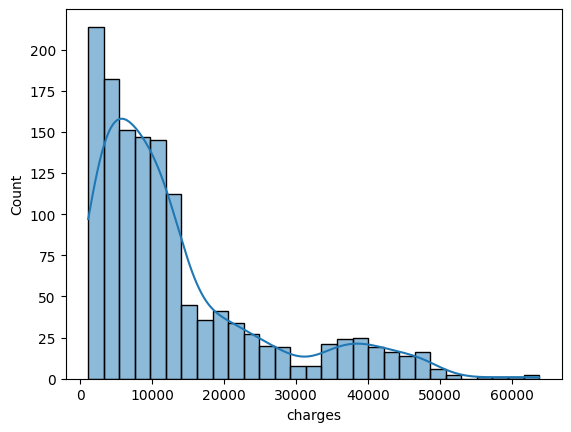

In [16]:
sns.histplot(data['charges'], kde=True)

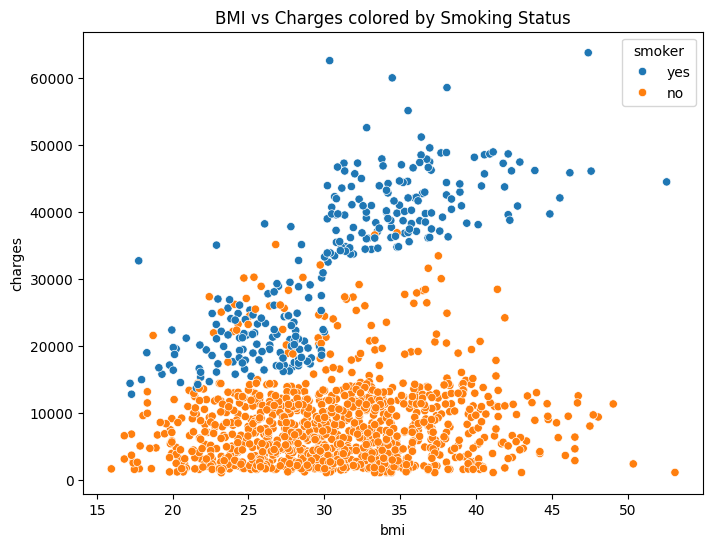

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title('BMI vs Charges colored by Smoking Status')
plt.show()

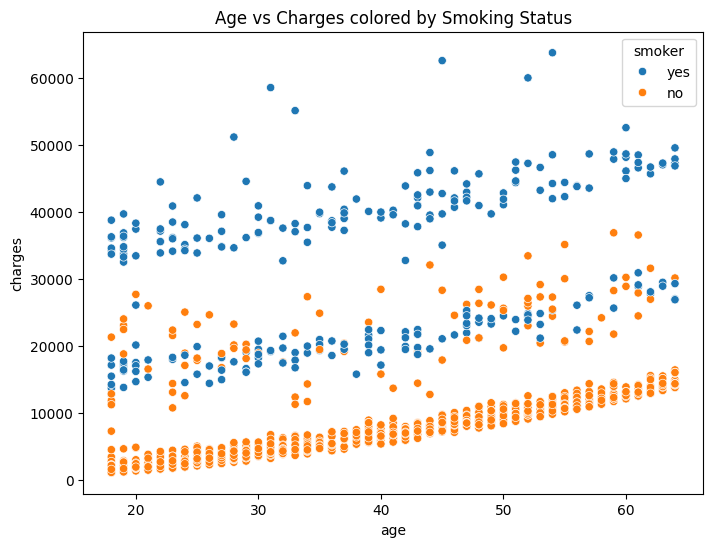

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data)
plt.title('Age vs Charges colored by Smoking Status')
plt.show()

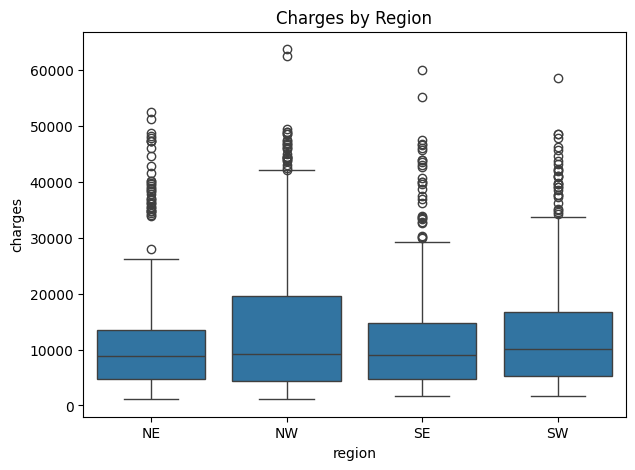

In [19]:
plt.figure(figsize=(7,5))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')
plt.xticks([0,1,2,3], ['NE','NW','SE','SW'])
plt.show()

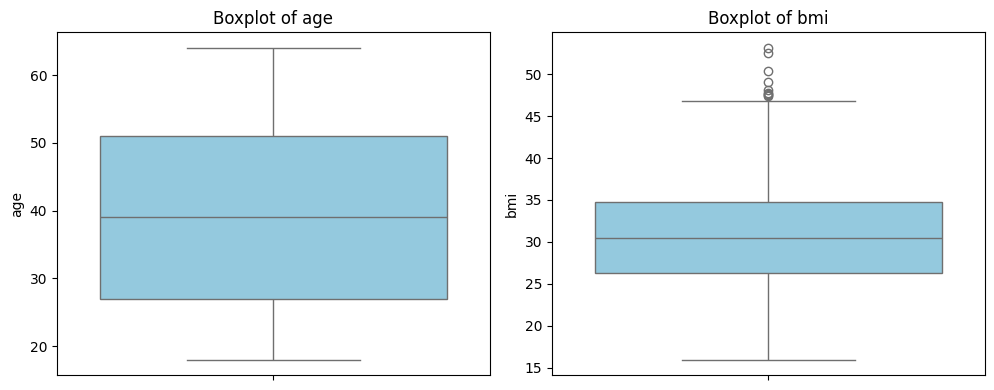

In [20]:


# Exclude 'charges' column
numeric_columns = ['age', 'bmi']

# Plot boxplots
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<ipython-input-21-95b1fe39b7c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bmi'] = data['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


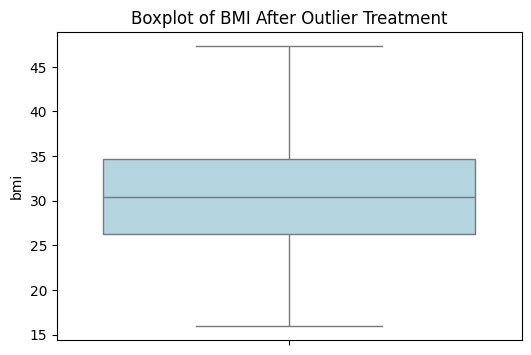

In [21]:


# Step 1: Calculate IQR for 'bmi'
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Cap outliers using upper and lower bounds
data['bmi'] = data['bmi'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Step 4: Boxplot after outlier treatment
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['bmi'], color='lightblue')
plt.title('Boxplot of BMI After Outlier Treatment')
plt.show()


In [22]:
# prompt: perform sacling on the age and BMI column

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the 'age' and 'bmi' columns
data_encoded[['age', 'bmi']] = scaler.fit_transform(data_encoded[['age', 'bmi']])

# Display the updated DataFrame
print(data_encoded.head())


        age  sex       bmi  children  smoker  region      charges
0  0.021739    0  0.321227         0       1       3  16884.92400
1  0.000000    1  0.479150         1       0       2   1725.55230
2  0.217391    1  0.458434         3       0       2   4449.46200
3  0.326087    1  0.181464         0       0       1  21984.47061
4  0.304348    1  0.347592         0       0       1   3866.85520


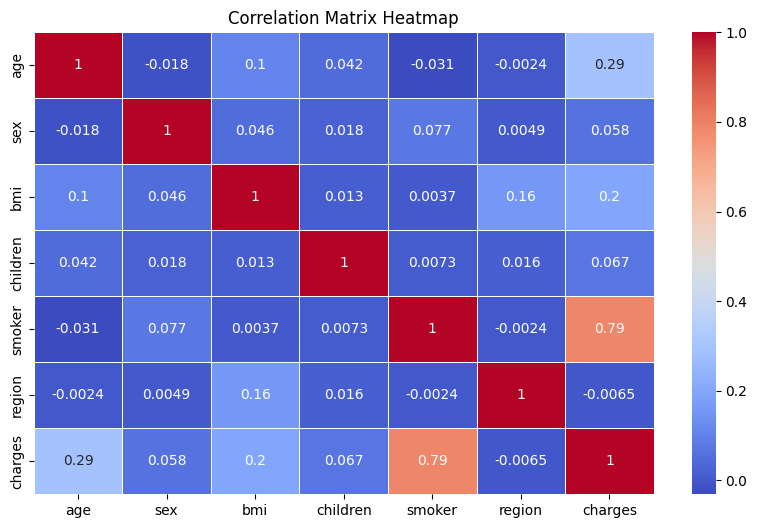

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = data_encoded.corr()

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')
plt.show()


In [24]:
# prompt: split the data into train and test

from sklearn.model_selection import train_test_split

# Assuming 'charges' is your target variable
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1069, 6) (268, 6) (1069,) (268,)


In [31]:
X_train

,age,sex,bmi,children,smoker,region
1114,0.108696,1,0.230024,0,0,0
968,0.065217,1,0.263250,2,0,0
599,0.739130,0,0.580172,2,0,1
170,0.978261,1,0.686306,0,0,2
275,0.630435,0,0.286252,2,0,0
...,...,...,...,...,...,...
1096,0.717391,0,0.511165,2,1,0
1131,0.195652,1,0.805488,2,0,3
1295,0.043478,1,0.162497,1,0,3
861,0.434783,0,0.323917,3,0,3


In [30]:
X_test

,age,sex,bmi,children,smoker,region
900,0.673913,1,0.176352,0,0,0
1064,0.239130,0,0.259349,4,0,3
1256,0.717391,0,0.549502,3,0,1
298,0.282609,1,0.495830,3,1,1
237,0.282609,1,0.603444,2,0,2
...,...,...,...,...,...,...
534,1.000000,1,0.659672,0,0,2
542,0.978261,0,0.547215,0,0,2
760,0.086957,0,0.500942,2,0,0
1284,0.934783,1,0.547215,1,1,3


In [27]:
# Dependent variable (Y)
y = data_encoded['charges']

# Independent variables (X) - all columns except 'charges'
X = data_encoded.drop('charges', axis=1)

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0,1,3
1,0.000000,1,0.479150,1,0,2
2,0.217391,1,0.458434,3,0,2
3,0.326087,1,0.181464,0,0,1
4,0.304348,1,0.347592,0,0,1
...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,1
1334,0.000000,0,0.429379,0,0,0
1335,0.000000,0,0.562012,0,0,2
1336,0.065217,0,0.264730,0,0,3


In [28]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [32]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Drop rows with NaNs from both X and y
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

# Add constant
X_train_sm = sm.add_constant(X_train_clean)

# Fit model
lr = sm.OLS(y_train_clean, X_train_sm).fit()

# Show summary
print(lr.summary())


age         5
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64
0
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     470.7
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          2.19e-294
Time:                        20:28:46   Log-Likelihood:                -10782.
No. Observations:                1064   AIC:                         2.158e+04
Df Residuals:                    1057   BIC:                         2.161e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [33]:
import statsmodels.api as sm

# Drop insignificant variables 'sex' and 'region' from X_train
X_train_reduced = X_train.drop(columns=['sex', 'region'], errors='ignore')

# Remove any rows with NaNs in X or y
X_train_reduced = X_train_reduced.dropna()
y_train_clean = y_train[X_train_reduced.index]

# Add a constant term
X_train_sm = sm.add_constant(X_train_reduced)

# Fit the regression model
lr = sm.OLS(y_train_clean, X_train_sm).fit()

# Print model summary
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     705.6
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          8.15e-297
Time:                        20:30:26   Log-Likelihood:                -10783.
No. Observations:                1064   AIC:                         2.158e+04
Df Residuals:                    1059   BIC:                         2.160e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1879.7125    574.673     -3.271      0.0

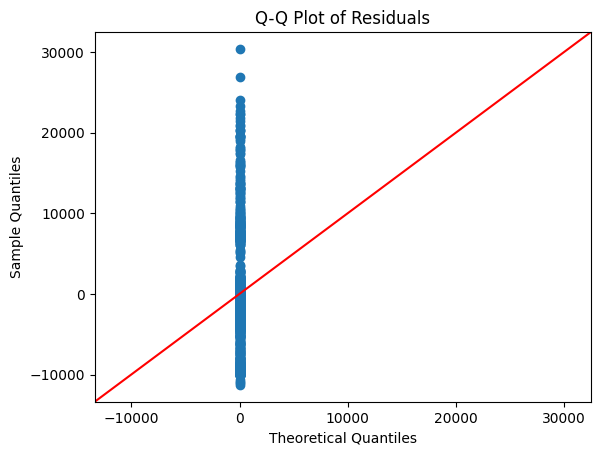

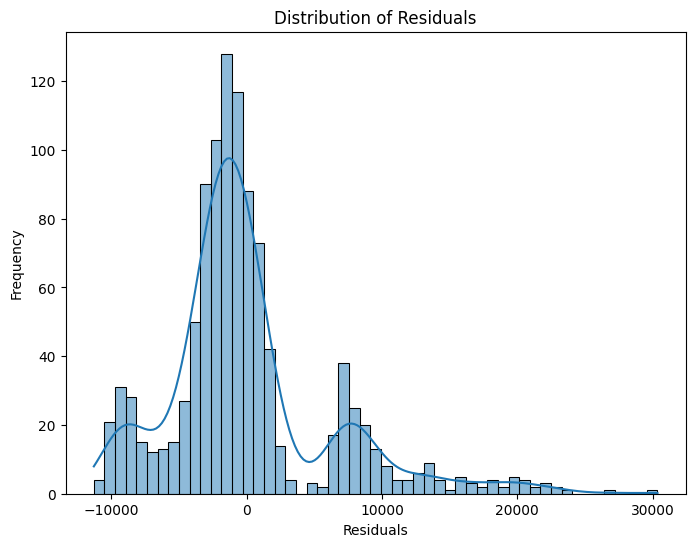

In [34]:
# prompt: Check if the residuals are normally distributed, aslo make a histogram with line

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'lr' is your fitted OLS model from the previous code
residuals = lr.resid

# Check for normality using a Q-Q plot
fig = sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Create a histogram of residuals with a fitted line
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


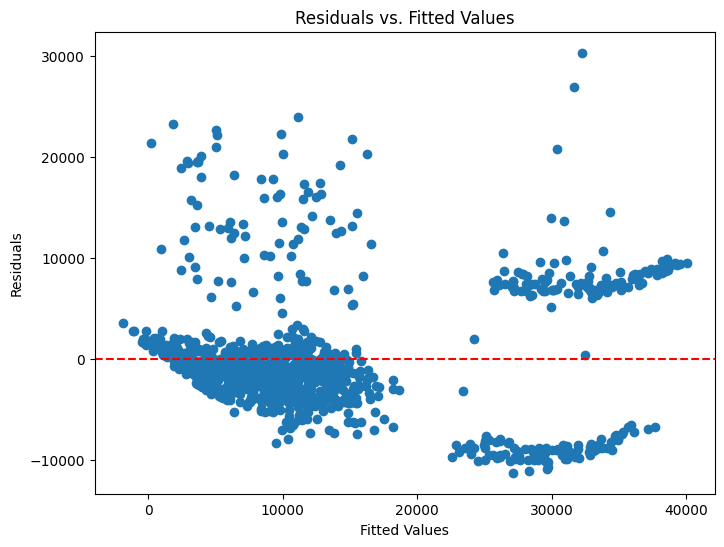

In [35]:
# prompt: check for homoscadasticity

import matplotlib.pyplot as plt
# Plot residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(lr.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


In [37]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd

# Predict the values and get residuals
predictions = lr.fittedvalues
residuals = lr.resid

# Perform White test
white_test = het_white(residuals, X_train_sm)

# Unpack results
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
results = dict(zip(labels, white_test))

# Display results
print("White Test Results:")
for key, value in results.items():
    print(f"{key}: {value}")


White Test Results:
Test Statistic: 91.21399982663274
Test Statistic p-value: 8.184486013421884e-14
F-Statistic: 7.573386747001804
F-Test p-value: 1.8341640758197893e-14
